# Product Recognition on Store Shelves
## Computer Vision and Image Processing - Exam Project
### Letizia Mancini, letizia.mancini3@studio.unibo.it

### Environment setup 

In [12]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt

# image directories
scene_dir = 'scenes'
product_dir = 'models'
# image names
scene_images = ['m1.png', 'm2.png', 'm3.png', 'm4.png', 'm5.png']
product_images = ['0.jpg', '1.jpg', '11.jpg', '19.jpg', '24.jpg', '26.jpg', '25.jpg']

img_train = []
img_query = [] 

In [13]:
## utils
def barycentre(keypoints):
    x = 0
    y = 0
    
    for kp in keypoints:
        x += kp.pt[0]
        y += kp.pt[1]
        
    x = x/len(keypoints)
    y = y/len(keypoints)
    
    return (x, y)        

In [14]:
class KeyPoint:
    def __init__(self, pc, kp, dest):
        self.vi = (pc[0] - kp.pt[0], pc[1] - kp.pt[1])
        self.kp = kp
        self.dest = dest    

#### Loading the images

In [15]:
# read the images
# load the train images (da fare ONLINE)
# for i in range( len(scene_images) ):
#    scene_images[i] = scene_dir + "/" + scene_images[i]
#    img_train.append( cv2.imread(scene_images[i], cv2.IMREAD_GRAYSCALE) ) # trainImage
    
# load the query images
for i in range(len(product_images)):
    product_images[i] = product_dir + "/" + product_images[i]
    img_query.append( cv2.imread(product_images[i], cv2.IMREAD_GRAYSCALE) ) # queryImage


### Offline phase
local invariant feature together with the GHT

#### 1. Keypoint Detection
Initialize the SIFT detector object in the following way:

In [16]:
# Creating SIFT object
sift = cv2.xfeatures2d.SIFT_create(nOctaveLayers=5, contrastThreshold=0.10, sigma=1.5)

Then we need to find keypoints. We will use detect method of the SIFT detector object. Let us find the keypoints of the query image:

In [17]:
# find the keypoints and descriptors with SIFT
kp_query = []

for img in img_query:
    kp_query.append(sift.detect(img))
    # Number of keypoints
    print(len(kp_query))

1
2
3
4
5
6
7


#### 2. Keypoints Description 

Compute for each keypoint a unique description usually based on the nearby pixels (descriptor support).
We will use the SIFT descriptor for this sample study. We can use the same SIFT detector object calling the *compute* method:

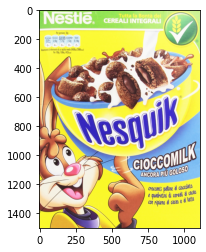

barycentre in (529.75, 650.18)


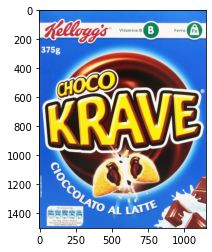

barycentre in (431.35, 977.06)


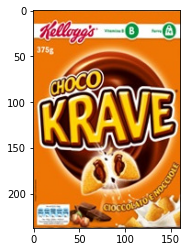

barycentre in (74.13, 118.00)


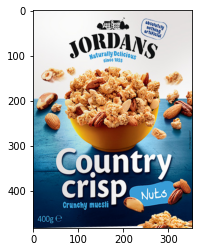

barycentre in (189.24, 225.31)


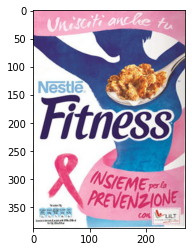

barycentre in (147.08, 215.85)


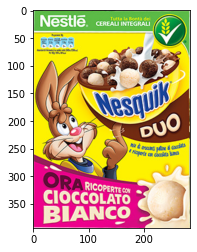

barycentre in (135.75, 194.29)


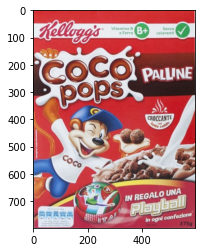

barycentre in (318.47, 471.36)


In [19]:
# Describing keypoints for query and train images 
## array perché lista mi dava errori sugli indici
des_query = np.empty(len(img_query), dtype=object)
kp_query_extended = []
img_query_rgb = [] ## immagini a colori

for img in product_images:
    img_query_rgb.append(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB))


for i in range(len(img_query)):
    kp_query[i], des_query[i] = sift.compute(img_query[i], kp_query[i])
    
    # calcolo il baricentro
    pc = barycentre(kp_query[i])
    kp_query_extended.append([])
    for k in range(len(kp_query[i])):
        kp_query_extended[i].append(KeyPoint(pc, kp_query[i][k], des_query[i][k]))
        
    plt.imshow(img_query_rgb[i])
    plt.show()
    print(f'barycentre in ({pc[0]:.2f}, { pc[1]:.2f})')
    
